Essentials

Once you hold the basics badge you may choose add to this work to attain the "essentials" level of this badge to do so, you should add more data to reach new kinds of conclusions. At a minimum, this should:

Draw on multiple sources of data and see how it intersects with the crime data. There are tons of sources you might draw from: housing sales, car traffic, weather, etc.
- There should be a minimum of one additional data source
- You should produce, at minimum, one scatter plot and one bar chart.
- You may, if you like, explore some regressions. It would be good practice. It is not, however, strictly required.

Store a resulting data set as a CSV. The CSV may be placed in a dropbox, Google Drive, or elsewhere (so as not to use up space on your Github account). Make sure you clearly differentiate your notebook as being for module 3 essentials, so that there is no confusion between this work and the work for basics. There is no quiz for this one. You need to have successfully completed the "basics" level and the "essentials" project on top of this. Make sure the two outcomes are separate sets of files (though, of course, the latter may build on the former).

In [1]:
# importing required packages
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# reading in crime data
df = pd.read_csv('Desktop/crimestat2.csv', quoting=csv.QUOTE_NONE)

# read in weather data
weather = pd.read_csv('Desktop/weather.csv')

In [4]:
df.head()

,"""INC NUMBER""","""OCCURRED ON""","""OCCURRED TO""","""UCR CRIME CATEGORY""","""100 BLOCK ADDR""","""ZIP""","""PREMISE TYPE"""
0,"""201600000052855""",11/01/2015 00:00,01/09/2016 00:00,"""MOTOR VEHICLE THEFT""","""N 43RD AVE & W CACTUS RD""","""85029""","""SINGLE FAMILY HOUSE"""
1,"""201600000594484""",11/01/2015 00:00,NaN,"""RAPE""","""13XX E ALMERIA RD""","""85006""","""SINGLE FAMILY HOUSE"""
2,"""201500002102327""",11/01/2015 00:00,11/01/2015 09:00,"""LARCENY-THEFT""","""51XX N 15TH ST""","""85014""","""APARTMENT"""
3,"""201500002101405""",11/01/2015 00:00,11/01/2015 05:00,"""MOTOR VEHICLE THEFT""","""102XX W MEDLOCK AVE""","""85307""","""SINGLE FAMILY HOUSE"""
4,"""201500002102668""",11/01/2015 00:00,11/01/2015 11:50,"""MOTOR VEHICLE THEFT""","""69XX W WOOD ST""","""85043""","""SINGLE FAMILY HOUSE"""


In [6]:
# ignore first 9 lines which are unneccessary information for analysis 
weather = weather.iloc[9:,]
# turn date field into datetime
weather['date'] = pd.to_datetime(weather['location']).dt.date
#turn weather into numeric
weather['temp'] = pd.to_numeric(weather['Basel'].str.strip('"'))

# preview weather data frame
weather.head()


,location,Basel,Basel.1,Basel.2,Basel.3,date,temp
9,20151031T0000,46.616444,91.93809,5.815978,111.80141,2015-10-31,46.616444
10,20151031T0100,46.688442,91.687454,5.154415,114.77514,2015-10-31,46.688442
11,20151031T0200,47.066444,92.46407,4.6938257,122.47119,2015-10-31,47.066444
12,20151031T0300,46.54444,94.24611,4.5820518,135.0,2015-10-31,46.544440
13,20151031T0400,45.77044,95.33506,4.072935,135.0,2015-10-31,45.770440


In [8]:
# group by day to find average temp by day
weather_grouped = weather.groupby('date')['temp'].mean()
weather_grouped.head()

date
2015-10-31    49.054691
2015-11-01    46.836941
2015-11-02    45.361691
2015-11-03    44.512691
2015-11-04    48.238691
Name: temp, dtype: float64

In [10]:
# strip quotes, transform date to datetime, transform zip to int for Pheonix dataset
df['date'] = pd.to_datetime(df['"OCCURRED ON"']).dt.date
df['ZIP'] = pd.to_numeric(df['"ZIP"'].str.strip('"'))

Finally ready to merge the two dataframes!

In [12]:
#merge dataframes
combined = pd.merge(df, weather_grouped, on = 'date', how = 'left', indicator = True)
combined.head()

,"""INC NUMBER""","""OCCURRED ON""","""OCCURRED TO""","""UCR CRIME CATEGORY""","""100 BLOCK ADDR""","""ZIP""","""PREMISE TYPE""",date,ZIP,temp,_merge
0,"""201600000052855""",11/01/2015 00:00,01/09/2016 00:00,"""MOTOR VEHICLE THEFT""","""N 43RD AVE & W CACTUS RD""","""85029""","""SINGLE FAMILY HOUSE""",2015-11-01,85029.0,46.836941,both
1,"""201600000594484""",11/01/2015 00:00,NaN,"""RAPE""","""13XX E ALMERIA RD""","""85006""","""SINGLE FAMILY HOUSE""",2015-11-01,85006.0,46.836941,both
2,"""201500002102327""",11/01/2015 00:00,11/01/2015 09:00,"""LARCENY-THEFT""","""51XX N 15TH ST""","""85014""","""APARTMENT""",2015-11-01,85014.0,46.836941,both
3,"""201500002101405""",11/01/2015 00:00,11/01/2015 05:00,"""MOTOR VEHICLE THEFT""","""102XX W MEDLOCK AVE""","""85307""","""SINGLE FAMILY HOUSE""",2015-11-01,85307.0,46.836941,both
4,"""201500002102668""",11/01/2015 00:00,11/01/2015 11:50,"""MOTOR VEHICLE THEFT""","""69XX W WOOD ST""","""85043""","""SINGLE FAMILY HOUSE""",2015-11-01,85043.0,46.836941,both


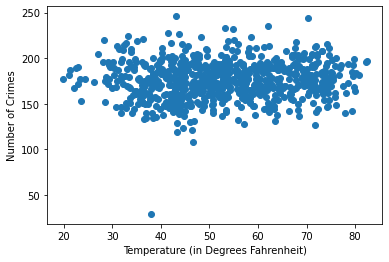

In [13]:
# looking at scatterplot between count of crimes and temperature to test my theory from the basics badge
x = combined.groupby('date').mean()['temp']
y = combined.groupby('date').count()['"INC NUMBER"']
plt.xlabel('Temperature (in Degrees Fahrenheit)')
plt.ylabel('Number of Crimes')
plt.scatter(x, y)
plt.show()

From this, it is difficult to tell exactly if there is a relationship between number of crimes in a given day and the temperature outside. We might see a slight increase in crime as weather increases, but I wouldn't feel confident making this assumption until I explore the data more. One thing I noticed when I was doing research preparing for this module is that different crimes are often correllated with specific temperatures. For example, outdoor crime is more likely to happen in the summer and indoor crime such as burglary are more likely to happen in colder month. Thus, in my next plot I want to explore only burglaries and see if we can identify a relationship there. 

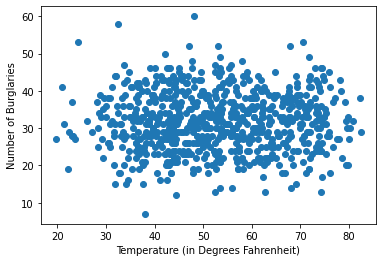

In [14]:
# looking to see if there is a relationship between burglary and weather
burglary = combined[combined['"UCR CRIME CATEGORY"'] == '"BURGLARY"']
x = burglary.groupby('date').mean()['temp']
y = burglary.groupby('date').count()['"INC NUMBER"']
plt.xlabel('Temperature (in Degrees Fahrenheit)')
plt.ylabel('Number of Burglaries')
plt.scatter(x, y)
plt.show()

From this scatterplot there also does not seem to be a clear relationship between temperature and number of burglaries. This may seem to disprove my theory, at least for Pheonix during this time period, that there would be a negative relationship between counts of burglary and temperature (as temperature increases, burglary decreases).

In [16]:
# create a grouped by weather column
combined.loc[combined['temp'].between(0, 40, 'both'), 'temp_group'] = '-40'
combined.loc[combined['temp'].between(40, 60, 'right'), 'temp_group'] = '40-60'
combined.loc[combined['temp'].between(60, 80, 'right'), 'temp_group'] = '60-80'
combined.loc[combined['temp'].between(80, 120, 'right'), 'temp_group'] = '80+'

combined['temp_group']

0         40-60
1         40-60
2         40-60
3         40-60
4         40-60
          ...  
131672      -40
131673      -40
131674      -40
131675      -40
131676      -40
Name: temp_group, Length: 131677, dtype: object

<BarContainer object of 4 artists>

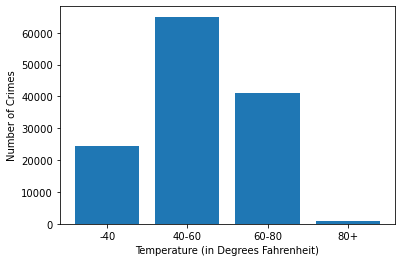

In [17]:
# group by temp group to count crimes
values = combined.groupby('temp_group').count()['"INC NUMBER"']
x = values.index
y = values.values
plt.xlabel('Temperature (in Degrees Fahrenheit)')
plt.ylabel('Number of Crimes')
plt.bar(x, y)

I also wanted to try exploring temperature and crime data by grouping by weather groups. One thing I am struggling with here is that I am not sure exactly what to make the weather groups. It is clear that the most crimes are happening between 40 and 60 degrees Fareinheit, but we also see that 40-60 degree days make up the majority of our dataset so it is hard to tell any sort of relationship here from looking at our bar plot. 

<BarContainer object of 4 artists>

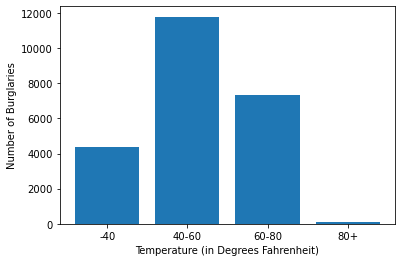

In [18]:
# group by temp group to count burglary crimes
burglary = combined[combined['"UCR CRIME CATEGORY"'] == '"BURGLARY"']
values_b = burglary.groupby('temp_group').count()['"INC NUMBER"']
x = values_b.index
y = values_b.values
plt.xlabel('Temperature (in Degrees Fahrenheit)')
plt.ylabel('Number of Burglaries')
plt.bar(x, y)

In [22]:
# linear regression
x = combined.groupby('date').mean()['temp']
y = combined.groupby('date').count()['"INC NUMBER"']
model = LinearRegression()

Tried looking into linear regression here using the sklearn package, unfortunately I must be doing something wrong. Either way, I don't think this linear regression would give us too much detail as we can see clearly from our scatterplot that there does not seem to be a relationship. 

In [ ]:
- (https://www.meteoblue.com/en/weather/archive/export?daterange=2015-10-31%20-%202017-11-17&locations%5B%5D=basel_switzerland_2661604&domain=ERA5T&min=2017-10-01&max=2017-11-17&params%5B%5D=&params%5B%5D=temp2m&params%5B%5D=&params%5B%5D=relhum2m&params%5B%5D=&params%5B%5D=wind%2Bdir10m&params%5B%5D=&params%5B%5D=&params%5B%5D=&params%5B%5D=&params%5B%5D=&utc_offset=1&timeResolution=hourly&temperatureunit=FAHRENHEIT&velocityunit=KILOMETER_PER_HOUR&energyunit=watts&lengthunit=metric&degree_day_type=10%3B30&gddBase=10&gddLimit=30)